Matplotlib is building the font cache; this may take a moment.


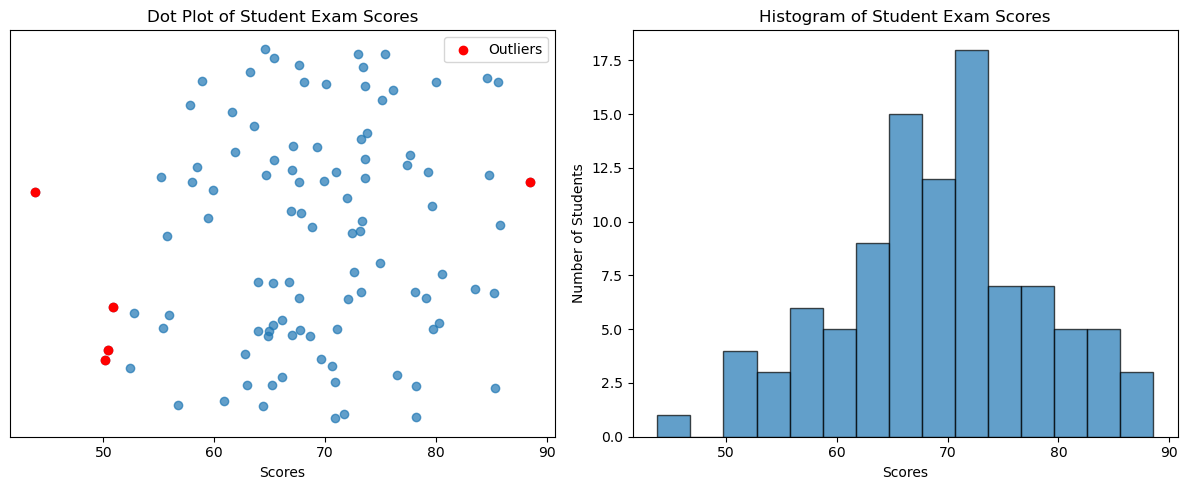

Mean score: 68.96
Standard deviation: 9.04
Outliers (z-score > 2 or < -2): [50.86719755 88.52278185 50.40329876 43.80254896 50.12431085]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
scores = np.random.normal(70, 10, 100)

mean_score = np.mean(scores)
std_score = np.std(scores)
z_scores = (scores - mean_score) / std_score

outliers = np.where((z_scores > 2) | (z_scores < -2))[0]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)

y_jitter = np.random.uniform(0.9, 1.1, size=len(scores))
plt.scatter(scores, y_jitter, alpha=0.7)
plt.yticks([])  # Hide y-axis ticks
plt.xlabel('Scores')
plt.title('Dot Plot of Student Exam Scores')

plt.scatter(scores[outliers], y_jitter[outliers], color='red', label='Outliers')
plt.legend()


plt.subplot(1, 2, 2)
plt.hist(scores, bins=15, alpha=0.7, edgecolor='black')
plt.xlabel('Scores')
plt.ylabel('Number of Students')
plt.title('Histogram of Student Exam Scores')

plt.tight_layout()
plt.show()

print(f"Mean score: {mean_score:.2f}")
print(f"Standard deviation: {std_score:.2f}")
print(f"Outliers (z-score > 2 or < -2): {scores[outliers]}")


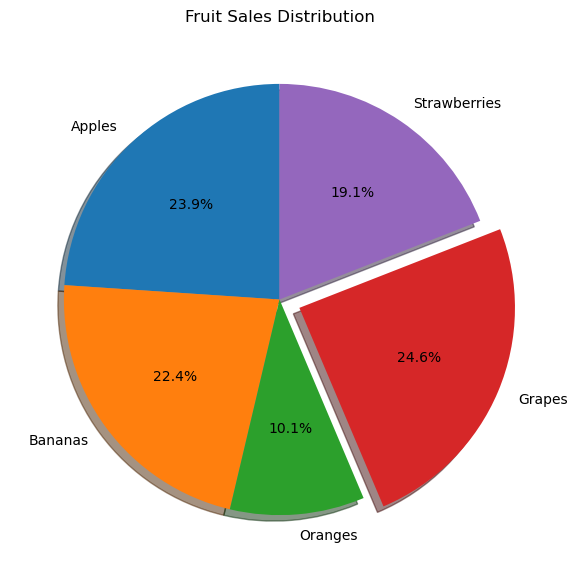

Fruit Sales Quantities:
Apples: 152
Bananas: 142
Oranges: 64
Grapes: 156
Strawberries: 121


In [2]:
import numpy as np
import matplotlib.pyplot as plt

fruits = ['Apples', 'Bananas', 'Oranges', 'Grapes', 'Strawberries']

np.random.seed(42)  # for reproducibility
sales = np.random.randint(50, 200, size=5)

explode = [0.1 if s == max(sales) else 0 for s in sales]

plt.figure(figsize=(7,7))
plt.pie(sales, labels=fruits, autopct='%1.1f%%', startangle=90, explode=explode, shadow=True)
plt.title('Fruit Sales Distribution')
plt.show()

print("Fruit Sales Quantities:")
for fruit, sale in zip(fruits, sales):
    print(f"{fruit}: {sale}")


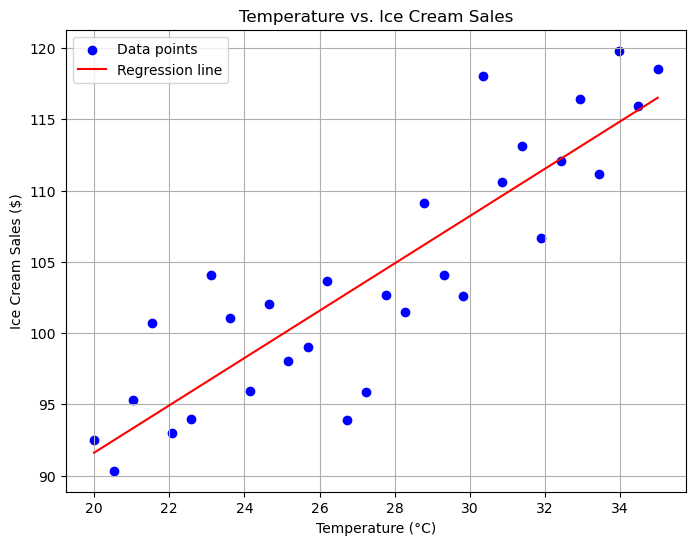

Pearson's correlation coefficient (r): 0.873
Interpretation: Strong correlation


In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
temp = np.linspace(20, 35, 30)  
sales = 50 + 2 * temp + np.random.normal(0, 5, 30)  

corr_matrix = np.corrcoef(temp, sales)
pearson_r = corr_matrix[0, 1]

def interpret_r(r):
    r_abs = abs(r)
    if r_abs >= 0.9:
        return "Very strong correlation"
    elif r_abs >= 0.7:
        return "Strong correlation"
    elif r_abs >= 0.5:
        return "Moderate correlation"
    elif r_abs >= 0.3:
        return "Weak correlation"
    else:
        return "Negligible correlation"

plt.figure(figsize=(8,6))
plt.scatter(temp, sales, color='blue', label='Data points')

slope, intercept = np.polyfit(temp, sales, 1)
regression_line = slope * temp + intercept
plt.plot(temp, regression_line, color='red', label='Regression line')

plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales ($)')
plt.title('Temperature vs. Ice Cream Sales')
plt.legend()

plt.grid(True)
plt.show()

print(f"Pearson's correlation coefficient (r): {pearson_r:.3f}")
print(f"Interpretation: {interpret_r(pearson_r)}")

C:\Users\NV_User\AppData\Local\Temp\ipykernel_2036\2608873685.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(data, labels=labels, patch_artist=True, boxprops=boxprops, medianprops=medianprops)


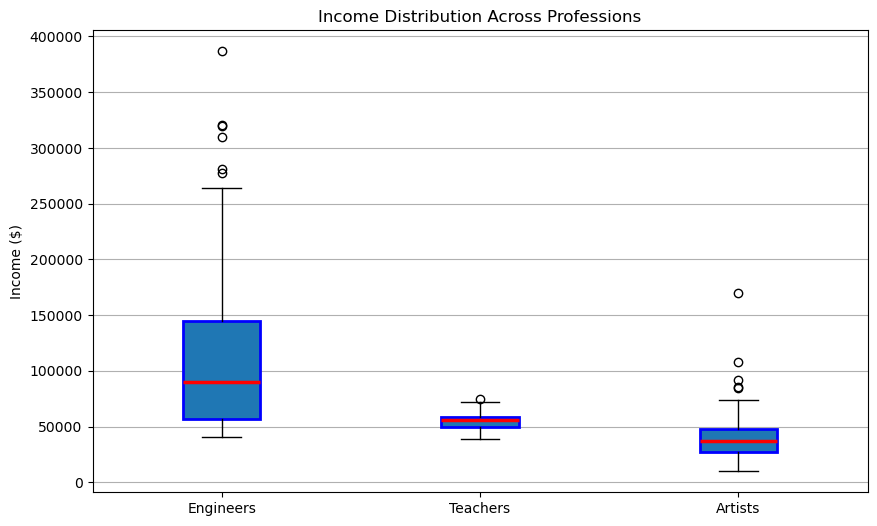


Engineers:
Median income: $89,920.03
IQR: $87,631.61
Number of outliers: 6
Outliers: [280809.7144734  320284.59801266 277895.02348055 309650.42739689
 319424.5706189  386731.70716699]

Teachers:
Median income: $55,622.44
IQR: $9,510.55
Number of outliers: 1
Outliers: [74705.93689988]

Artists:
Median income: $37,216.16
IQR: $20,690.24
Number of outliers: 5
Outliers: [107803.74387049 169582.12407129  91662.02283077  85611.7343044
  84868.85645586]


In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

engineers = np.random.exponential(80000, 100) + 40000  
teachers = np.random.normal(55000, 8000, 100)         
artists = np.random.lognormal(10.5, 0.4, 100)       

data = [engineers, teachers, artists]
labels = ['Engineers', 'Teachers', 'Artists']

plt.figure(figsize=(10, 6))
boxprops = dict(linestyle='-', linewidth=2, color='blue')
medianprops = dict(linestyle='-', linewidth=2.5, color='red')

bp = plt.boxplot(data, labels=labels, patch_artist=True, boxprops=boxprops, medianprops=medianprops)

plt.title('Income Distribution Across Professions')
plt.ylabel('Income ($)')
plt.grid(True, axis='y')

plt.show()

def print_stats(arr, profession):
    median = np.median(arr)
    q1 = np.percentile(arr, 25)
    q3 = np.percentile(arr, 75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = arr[(arr < lower_bound) | (arr > upper_bound)]

    print(f"\n{profession}:")
    print(f"Median income: ${median:,.2f}")
    print(f"IQR: ${iqr:,.2f}")
    print(f"Number of outliers: {len(outliers)}")
    if len(outliers) > 0:
        print(f"Outliers: {outliers}")

for arr, profession in zip(data, labels):
    print_stats(arr, profession)


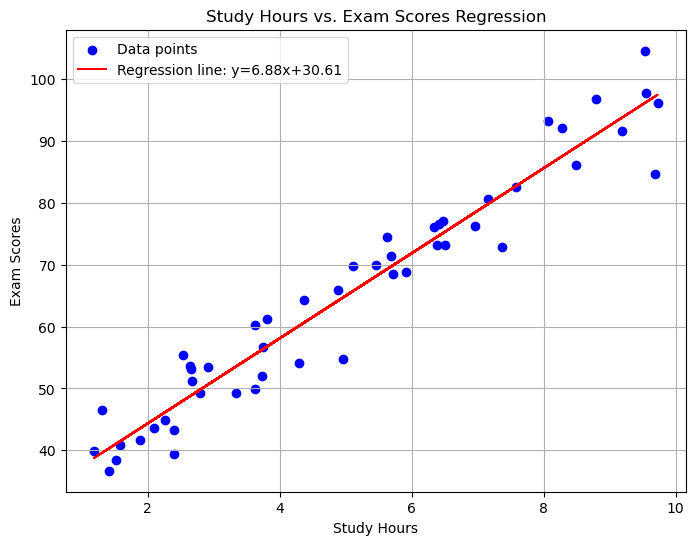

Slope: 6.88
Intercept: 30.61
R-squared: 0.938
Interpretation: Very strong fit


In [5]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
hours = np.random.uniform(1, 10, 50)
scores = 30 + 7 * hours + np.random.normal(0, 5, 50)  

coeffs = np.polyfit(hours, scores, 1)
slope, intercept = coeffs

scores_pred = slope * hours + intercept

ss_res = np.sum((scores - scores_pred) ** 2)
ss_tot = np.sum((scores - np.mean(scores)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

plt.figure(figsize=(8,6))
plt.scatter(hours, scores, color='blue', label='Data points')
plt.plot(hours, scores_pred, color='red', label=f'Regression line: y={slope:.2f}x+{intercept:.2f}')
plt.xlabel('Study Hours')
plt.ylabel('Exam Scores')
plt.title('Study Hours vs. Exam Scores Regression')
plt.legend()
plt.grid(True)
plt.show()

print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_squared:.3f}")

def interpret_r2(r2):
    if r2 >= 0.9:
        return "Very strong fit"
    elif r2 >= 0.7:
        return "Strong fit"
    elif r2 >= 0.5:
        return "Moderate fit"
    elif r2 >= 0.3:
        return "Weak fit"
    else:
        return "Very weak fit"

print(f"Interpretation: {interpret_r2(r_squared)}")

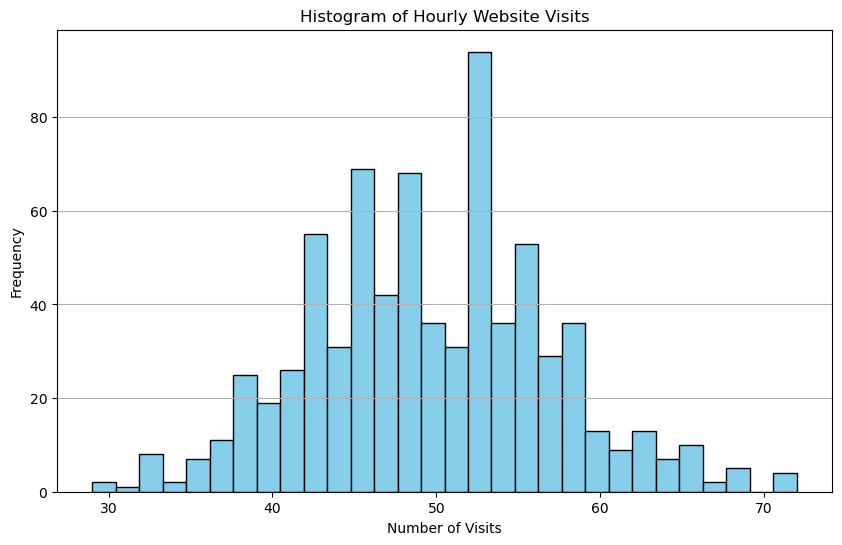

Mean hourly visits: 49.65
Standard deviation: 7.35
Number of anomalies (z-score > 3): 2
Anomalous hours and their visit counts:
Day 24, Hour 5: 72 visits (z-score = 3.04)
Day 25, Hour 12: 72 visits (z-score = 3.04)


In [6]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
traffic = np.random.poisson(lam=50, size=744)  

plt.figure(figsize=(10,6))
plt.hist(traffic, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Hourly Website Visits')
plt.xlabel('Number of Visits')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

mean_traffic = np.mean(traffic)
std_traffic = np.std(traffic)
z_scores = (traffic - mean_traffic) / std_traffic

anomalies_indices = np.where(z_scores > 3)[0]
anomalies_values = traffic[anomalies_indices]

print(f"Mean hourly visits: {mean_traffic:.2f}")
print(f"Standard deviation: {std_traffic:.2f}")
print(f"Number of anomalies (z-score > 3): {len(anomalies_indices)}")
print("Anomalous hours and their visit counts:")
for idx, val in zip(anomalies_indices, anomalies_values):
    day = idx // 24 + 1
    hour = idx % 24
    print(f"Day {day}, Hour {hour}: {val} visits (z-score = {(z_scores[idx]):.2f})")


Pearson's r: 0.995
P-value: 2.04e-11


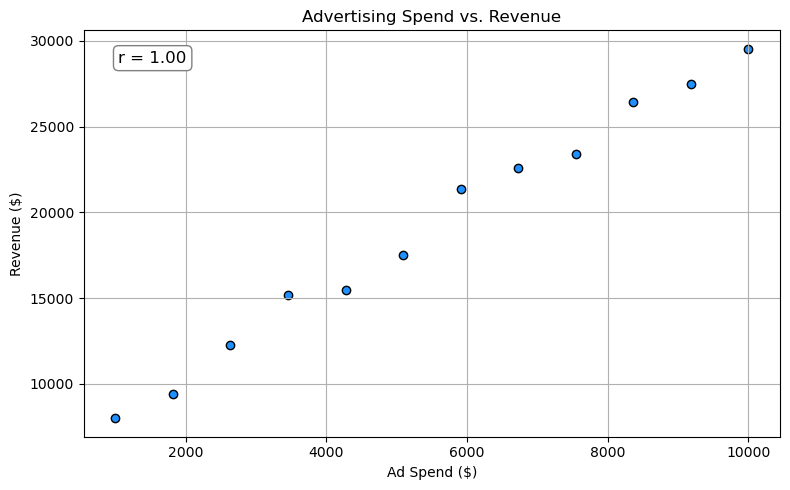

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

np.random.seed(42)
spend = np.linspace(1000, 10000, 12)  
revenue = 5000 + 2.5 * spend + np.random.normal(0, 1000, 12) 

r_value, p_value = pearsonr(spend, revenue)

print(f"Pearson's r: {r_value:.3f}")
print(f"P-value: {p_value:.3g}")

plt.figure(figsize=(8, 5))
plt.scatter(spend, revenue, color='dodgerblue', edgecolor='k')
plt.title('Advertising Spend vs. Revenue')
plt.xlabel('Ad Spend ($)')
plt.ylabel('Revenue ($)')
plt.grid(True)

plt.annotate(f"r = {r_value:.2f}", xy=(0.05, 0.95), xycoords='axes fraction',
             fontsize=12, ha='left', va='top',
             bbox=dict(boxstyle="round", fc="white", ec="gray"))

plt.tight_layout()
plt.show()

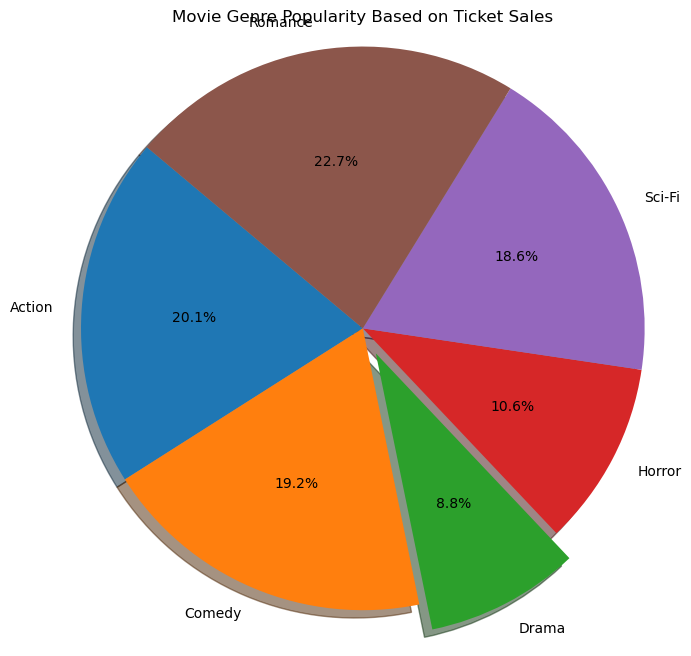

In [8]:
import numpy as np
import matplotlib.pyplot as plt

genres = ['Action', 'Comedy', 'Drama', 'Horror', 'Sci-Fi', 'Romance']

tickets = np.random.randint(5000, 30000, size=6)

min_idx = np.argmin(tickets)

explode = [0.1 if i == min_idx else 0 for i in range(len(genres))]

plt.figure(figsize=(8, 8))
plt.pie(tickets, labels=genres, autopct='%1.1f%%', explode=explode, shadow=True, startangle=140)

plt.title('Movie Genre Popularity Based on Ticket Sales')

plt.axis('equal')

plt.show()

C:\Users\NV_User\AppData\Local\Temp\ipykernel_2036\1793125889.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, vert=True, patch_artist=True, labels=labels)


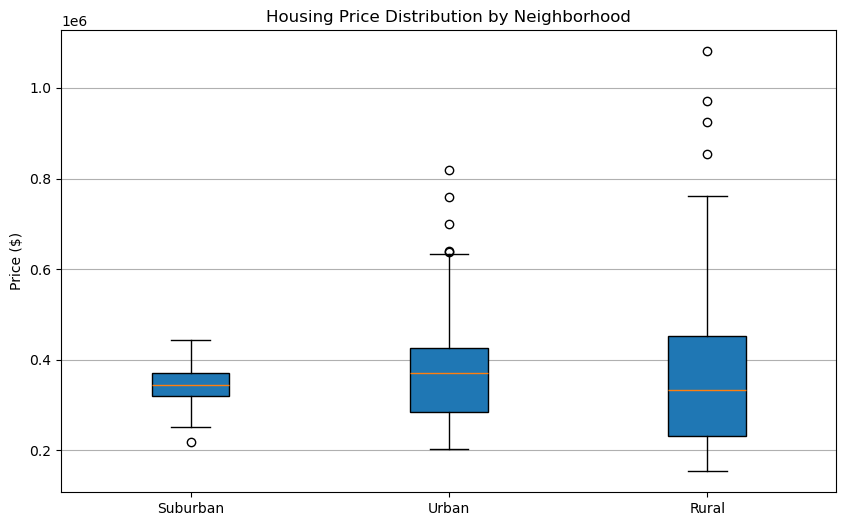

Suburban - Median: $343,652, IQR: $50,343
Urban - Median: $371,477, IQR: $141,251
Rural - Median: $333,118, IQR: $221,428


In [9]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

suburban = np.random.normal(350000, 50000, 100)

urban = np.random.lognormal(mean=12.8, sigma=0.3, size=100)

rural = np.random.exponential(scale=250000, size=100) + 150000

data = [suburban, urban, rural]
labels = ['Suburban', 'Urban', 'Rural']

plt.figure(figsize=(10, 6))
plt.boxplot(data, vert=True, patch_artist=True, labels=labels)

plt.title('Housing Price Distribution by Neighborhood')
plt.ylabel('Price ($)')
plt.grid(axis='y')
plt.show()

for name, prices in zip(labels, data):
    median = np.median(prices)
    q1 = np.percentile(prices, 25)
    q3 = np.percentile(prices, 75)
    iqr = q3 - q1
    print(f"{name} - Median: ${median:,.0f}, IQR: ${iqr:,.0f}")


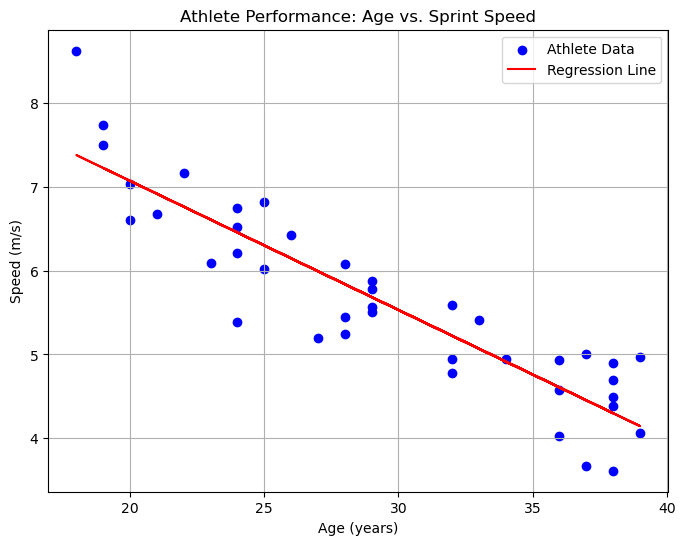

Pearson’s Correlation Coefficient (r): -0.903
P-value: 0.0

Interpretation:
There is a negative correlation between age and sprint speed.
As age increases, sprint speed tends to decrease.


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress, pearsonr

np.random.seed(42)
age = np.random.randint(18, 40, 40)
speed = 10 - 0.15 * age + np.random.normal(0, 0.5, 40)  

slope, intercept, r_value, p_value, std_err = linregress(age, speed)
regression_line = slope * age + intercept

plt.figure(figsize=(8, 6))
plt.scatter(age, speed, color='blue', label='Athlete Data')
plt.plot(age, regression_line, color='red', label='Regression Line')
plt.title('Athlete Performance: Age vs. Sprint Speed')
plt.xlabel('Age (years)')
plt.ylabel('Speed (m/s)')
plt.legend()
plt.grid(True)
plt.show()

r, p = pearsonr(age, speed)

print("Pearson’s Correlation Coefficient (r):", round(r, 3))
print("P-value:", round(p, 5))

if r < 0:
    relationship = "negative"
elif r > 0:
    relationship = "positive"
else:
    relationship = "no"

print(f"\nInterpretation:")
print(f"There is a {relationship} correlation between age and sprint speed.")
print("As age increases, sprint speed tends to decrease.")